<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/8_AdvancedTrainingConcepts/CIFAR10_ResNet18_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!git clone https://github.com/gkdivya/torch_cv_wrapper

Cloning into 'torch_cv_wrapper'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 98 (delta 46), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [2]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-2kgffyow
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-2kgffyow
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=9a81518ae028a4edb2e4612edb1314beb8e6cf9f7e3c72d2d2c93eb464123fc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-st9kxd0i/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
BASE_DIR='/content/torch_cv_wrapper'
%cd $BASE_DIR

/content/torch_cv_wrapper


In [4]:
import torch
from __future__ import print_function
from pprint import pprint

from utils import gradcam, plot_metrics, train, test, helper
from dataloader.load_data import Cifar10DataLoader
from main import TriggerEngine
from model import resnet

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

## Load config file

In [5]:
config = helper.process_config("./config/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'CIFAR10DataLoader'},
 'model': 'Resnet18',
 'model_params': {'dropout': 0.05,
                  'experiment_name': 'cifar10_with_resnet18',
                  'model_dir': './model/',
                  'seed': 1},
 'optimizer': {'args': {'lr': 0.01}, 'type': 'optim.SGD'},
 'training_params': {'epochs': 40, 'l1_factor': 0, 'l2_factor': 0.0001}}


## Download data and view sample images


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


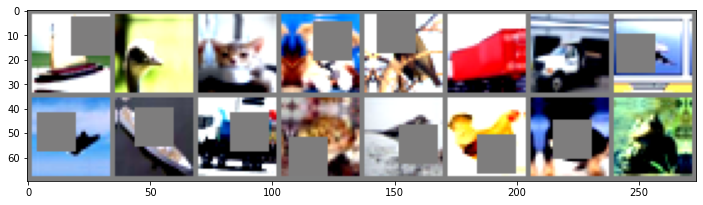

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=Cifar10DataLoader(config)
print(cifar_dataset)
classes= config['data_loader']['classes']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
train_loader, test_loader = cifar_dataset.get_dataloader()
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:16]))

## Trigger training

In [11]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
model = resnet.ResNet18()
#model = model.to(device)

trigger_training=TriggerEngine(config)
train_loader, test_loader = trigger_training.dataloader()
# trigger_training.
train_accuracy, train_losses, test_accuracy, test_losses = trigger_training.run_experiment(model, train_loader, test_loader)
trigger_training.save_experiment(model, experiment_name, '/content/torch_cv_wrapper/saved_models')

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.60940420627594 Batch_id=195 LR=0.00056 Accuracy=29.71: 100%|██████████| 196/196 [00:26<00:00,  7.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 1605/10000 (16.05%)

Epoch 2:


Loss=1.4555680751800537 Batch_id=195 LR=0.00104 Accuracy=44.63: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 2880/10000 (28.80%)

Epoch 3:


Loss=0.9937517046928406 Batch_id=195 LR=0.00181 Accuracy=52.70: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 2162/10000 (21.62%)

Epoch 4:


Loss=1.0405657291412354 Batch_id=195 LR=0.00280 Accuracy=58.78: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 2862/10000 (28.62%)

Epoch 5:


Loss=0.8136435747146606 Batch_id=195 LR=0.00396 Accuracy=64.07: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 3553/10000 (35.53%)

Epoch 6:


Loss=0.8277665972709656 Batch_id=195 LR=0.00520 Accuracy=67.89: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 4130/10000 (41.30%)

Epoch 7:


Loss=0.8467960357666016 Batch_id=195 LR=0.00645 Accuracy=70.85: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 3779/10000 (37.79%)

Epoch 8:


Loss=0.7081969380378723 Batch_id=195 LR=0.00760 Accuracy=73.50: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 1988/10000 (19.88%)

Epoch 9:


Loss=0.5074981451034546 Batch_id=195 LR=0.00860 Accuracy=75.15: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 4622/10000 (46.22%)

Epoch 10:


Loss=0.6807206869125366 Batch_id=195 LR=0.00936 Accuracy=77.10: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 2759/10000 (27.59%)

Epoch 11:


Loss=0.6682493686676025 Batch_id=195 LR=0.00984 Accuracy=78.69: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 3378/10000 (33.78%)

Epoch 12:


Loss=0.6703994274139404 Batch_id=195 LR=0.01000 Accuracy=79.78: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 4599/10000 (45.99%)

Epoch 13:


Loss=0.3659433126449585 Batch_id=195 LR=0.00997 Accuracy=81.00: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 2072/10000 (20.72%)

Epoch 14:


Loss=0.3977247476577759 Batch_id=195 LR=0.00987 Accuracy=82.12: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 2927/10000 (29.27%)

Epoch 15:


Loss=0.5897216796875 Batch_id=195 LR=0.00972 Accuracy=82.80: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 2357/10000 (23.57%)

Epoch 16:


Loss=0.37790876626968384 Batch_id=195 LR=0.00950 Accuracy=83.95: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 4498/10000 (44.98%)

Epoch 17:


Loss=0.48519033193588257 Batch_id=195 LR=0.00923 Accuracy=84.38: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 3075/10000 (30.75%)

Epoch 18:


Loss=0.3723599314689636 Batch_id=195 LR=0.00891 Accuracy=85.50: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 3907/10000 (39.07%)

Epoch 19:


Loss=0.5174136757850647 Batch_id=195 LR=0.00853 Accuracy=85.96: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 3763/10000 (37.63%)

Epoch 20:


Loss=0.48501497507095337 Batch_id=195 LR=0.00812 Accuracy=86.49: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 1997/10000 (19.97%)

Epoch 21:


Loss=0.43416982889175415 Batch_id=195 LR=0.00766 Accuracy=87.32: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 2720/10000 (27.20%)

Epoch 22:


Loss=0.3021014332771301 Batch_id=195 LR=0.00717 Accuracy=87.77: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 2513/10000 (25.13%)

Epoch 23:


Loss=0.39570513367652893 Batch_id=195 LR=0.00665 Accuracy=88.28: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 3039/10000 (30.39%)

Epoch 24:


Loss=0.209119513630867 Batch_id=195 LR=0.00611 Accuracy=88.99: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 2454/10000 (24.54%)

Epoch 25:


Loss=0.23830357193946838 Batch_id=195 LR=0.00556 Accuracy=89.45: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 1554/10000 (15.54%)

Epoch 26:


Loss=0.2938087582588196 Batch_id=195 LR=0.00500 Accuracy=89.84: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 1465/10000 (14.65%)

Epoch 27:


Loss=0.25598078966140747 Batch_id=195 LR=0.00444 Accuracy=90.43: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 2365/10000 (23.65%)

Epoch 28:


Loss=0.15803402662277222 Batch_id=195 LR=0.00388 Accuracy=91.02: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 2686/10000 (26.86%)

Epoch 29:


Loss=0.44464200735092163 Batch_id=195 LR=0.00335 Accuracy=91.52: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 1630/10000 (16.30%)

Epoch 30:


Loss=0.3587300777435303 Batch_id=195 LR=0.00283 Accuracy=91.93: 100%|██████████| 196/196 [00:26<00:00,  7.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0132, Accuracy: 1565/10000 (15.65%)

Epoch 31:


Loss=0.17781606316566467 Batch_id=195 LR=0.00234 Accuracy=92.35: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0130, Accuracy: 1889/10000 (18.89%)

Epoch 32:


Loss=0.17173784971237183 Batch_id=195 LR=0.00188 Accuracy=93.11: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0144, Accuracy: 1582/10000 (15.82%)

Epoch 33:


Loss=0.246977761387825 Batch_id=195 LR=0.00146 Accuracy=93.46: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 1694/10000 (16.94%)

Epoch 34:


Loss=0.1985815316438675 Batch_id=195 LR=0.00109 Accuracy=93.93: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 1452/10000 (14.52%)

Epoch 35:


Loss=0.18820567429065704 Batch_id=195 LR=0.00076 Accuracy=94.50: 100%|██████████| 196/196 [00:26<00:00,  7.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 1355/10000 (13.55%)

Epoch 36:


Loss=0.2800591289997101 Batch_id=195 LR=0.00049 Accuracy=94.85: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 1247/10000 (12.47%)

Epoch 37:


Loss=0.24569261074066162 Batch_id=195 LR=0.00028 Accuracy=95.03: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 1242/10000 (12.42%)

Epoch 38:


Loss=0.13620558381080627 Batch_id=195 LR=0.00012 Accuracy=95.33: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 1165/10000 (11.65%)

Epoch 39:


Loss=0.10204813629388809 Batch_id=195 LR=0.00003 Accuracy=95.56: 100%|██████████| 196/196 [00:26<00:00,  7.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 1183/10000 (11.83%)

Epoch 40:


Loss=0.11044386774301529 Batch_id=195 LR=0.00000 Accuracy=95.52: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]



Test set: Average loss: 0.0185, Accuracy: 1191/10000 (11.91%)

Saving the model for cifar10_with_resnet18


## Model summary

In [ ]:
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           2,080
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

## Missclassification

Total wrong predictions are 8809
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


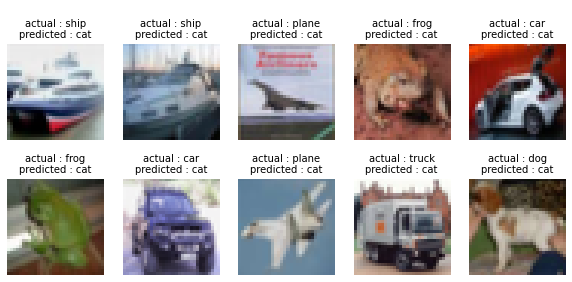

[(tensor([[[ 1.7413,  1.6778,  1.6937,  ...,  1.7096,  1.7096,  1.6937],
           [ 1.7890,  1.7413,  1.7413,  ...,  1.7572,  1.7572,  1.7413],
           [ 1.7731,  1.7255,  1.7255,  ...,  1.7413,  1.7413,  1.7255],
           ...,
           [-0.6081, -1.3066, -1.6876,  ...,  0.6936,  0.9000,  0.9952],
           [-0.6875, -1.2590, -1.4177,  ...,  0.7730,  0.9476,  0.9794],
           [-0.6399, -1.0050, -1.0685,  ...,  0.6777,  0.8682,  0.9635]],
  
          [[ 1.8047,  1.7402,  1.7564,  ...,  1.7725,  1.7725,  1.7564],
           [ 1.8530,  1.8047,  1.8047,  ...,  1.8208,  1.8208,  1.8047],
           [ 1.8369,  1.7886,  1.7886,  ...,  1.8047,  1.8047,  1.7886],
           ...,
           [-0.3857, -1.1588, -1.6098,  ...,  0.9833,  1.1926,  1.2732],
           [-0.4341, -1.0622, -1.2716,  ...,  1.0638,  1.2410,  1.2732],
           [-0.3535, -0.7723, -0.9011,  ...,  0.9672,  1.1604,  1.2410]],
  
          [[ 1.8160,  1.7560,  1.7710,  ...,  1.7860,  1.7860,  1.7710],
           

In [13]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model, test_loader)

## Plots for Validation Loss and Accuracy

In [14]:
plot_metrics.plot_metrics()

KeyError: ignored

## Accuracy for each class

In [15]:
helper.class_level_accuracy(model, test_loader, device, classes)

Accuracy of plane :  0 %
Accuracy of   car :  2 %
Accuracy of  bird :  7 %
Accuracy of   cat : 99 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  6 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  2 %
